In [1]:
import madx.optics_parameters as mop
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import time
import importlib
import data.bunch_configuration as buc
import visualization.optics_parameter_visualisation as opv
sns.set_style("whitegrid")
import numpy as np
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
import os
import madx.particles_trajectory_generator as ptg
import importlib as il
import data.bunch_configuration as buc
import madx.madx_configuration as mc
import visualization.visualize as visualize
import madx.matrix_indexes as matrix_indexes_madx
sys.path.append("/home/rafalmucha/Pobrane/optic/optics_generator_python/src")
path_to_configuration = "/home/rafalmucha/Pobrane/optic/2017/"
path_to_xml_file = "/home/rafalmucha/Pobrane/optic/2017/configuration_reco_beam1.xml"
item_number = 0
madx_configuration = mc.MadxConfiguration(path_to_xml_file, item_number, path_to_configuration)

Welcome to JupyROOT 6.16/00


In [2]:
# Parameters of bunch
x_mean = 0.0
sigma_x = 0
theta_x_mean = 1.5e-4
sigma_theta_x = 0
y_mean = -1.5e-3
sigma_y = 0
theta_y_mean = 0.00
sigma_theta_y = 0
pt_mean = 0
sigma_pt = 0.2

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 1001

In [3]:
bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, number_of_x_values,
                                                        theta_x_mean, sigma_theta_x, number_of_theta_x_values,
                                                        y_mean, sigma_y, number_of_y_values,
                                                        theta_y_mean, sigma_theta_y, number_of_theta_y_values,
                                                        pt_mean, sigma_pt, number_of_pt_values)

In [4]:
output = ptg.generate_from_range(madx_configuration, bunch_configuration)

In [5]:
merged_matrix = np.empty((0, output["start"].shape[1]))
for key in output:
    merged_matrix = np.append(merged_matrix, output[key], axis=0)
merged_matrix

array([[ 1.00000000e+00,  1.00000000e+00,  1.67246712e-02, ...,
        -2.00000000e-01,  1.67480500e+02,  6.50000000e+03],
       [ 2.00000000e+00,  1.00000000e+00,  1.66870155e-02, ...,
        -1.99600000e-01,  1.67480500e+02,  6.50000000e+03],
       [ 3.00000000e+00,  1.00000000e+00,  1.66493884e-02, ...,
        -1.99200000e-01,  1.67480500e+02,  6.50000000e+03],
       ...,
       [ 9.99000000e+02,  1.00000000e+00, -8.50936743e-03, ...,
         1.99200000e-01,  1.42750000e+02,  6.50000000e+03],
       [ 1.00000000e+03,  1.00000000e+00, -8.52789124e-03, ...,
         1.99600000e-01,  1.42750000e+02,  6.50000000e+03],
       [ 1.00100000e+03,  1.00000000e+00, -8.54640631e-03, ...,
         2.00000000e-01,  1.42750000e+02,  6.50000000e+03]])

In [7]:
pt = 0

filtered_matrix = merged_matrix[np.isclose(merged_matrix.T[matrix_indexes_madx.ptc_track["pt"]], pt)] 
filtered_matrix.shape

(11, 10)

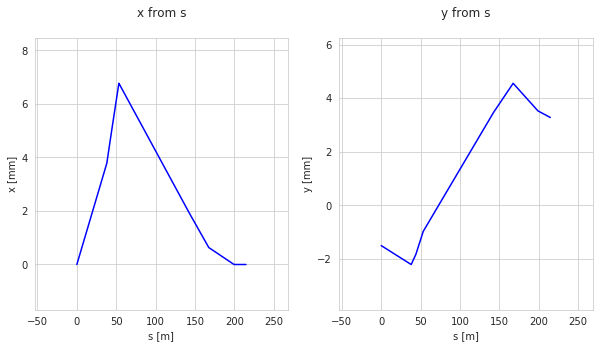

In [8]:
f, axes = plt.subplots(1, 2)

fig = plt.gcf()
fig.set_size_inches(10,5)

visualize.plot_from_two_matrices("s", "x", filtered_matrix, filtered_matrix, matrix_indexes_madx.ptc_track, matrix_indexes_madx.ptc_track, axes, 0)

visualize.plot_from_two_matrices("s", "y", filtered_matrix, filtered_matrix, matrix_indexes_madx.ptc_track, matrix_indexes_madx.ptc_track, axes, 1)